___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [98]:
from pandas_datareader import data, wb
import pandas as pd
pd.__version__ == '1.0.0'
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

** Google the ticker symbols Remote data readers are listed in the API, google it for the latest. Yahoo wasn't in the API, but in the Q&A section. stooq also worked google no longer works ? Not sure how you are meant to select the correct reader. **

In [65]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)
# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)
# JP Morgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)
# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [4]:
WFC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [10]:
ticker = ['BAC','C','MS','WFC','JPM','GS']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

**
when concatinating 2 Df's you can do it on the columns or rows. Default is rows, axis=1 is for columns, axis = 0 is for rows
on rows the key that you choose become the Index
**

In [13]:
bank_stocks = pd.concat( [BAC, C, MS, WFC, JPM, GS], keys=ticker, axis=1)

** Set the column name levels (this is filled out for you):**

In [14]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [16]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker        JPM                                            GS  \
Stock Info        Open      Close      Volume  Adj Close        High   
Date                                                                   
2006-01-03   39.830002  40.189999  12838600.0  27.529718  129.440002   
2006-01-04   39.779999  39.619999  13491500.0  27.370821  128.910004   
2006-01-05   39.610001  39.740002   8109400.0  27.453718  127.320000   
2006-01-06   39.919998  40.020000   7966900.0  27.647156  129.250000   
2006-01-09   39.880001  40.669998  16575200.0  28.096193  130.619995   

Bank Ticker                                                             
Stock Info          Low        Open       Close     Volume   Adj Close  
Date                                                                    
2006-01-03   124.230003  126.699997  128.869995  6188700.0  106.906731  
2006-01-04   126.379997  127.349998  127.089996  4861600.0  105.430092  
2006-01-05   125.610001  126.000000  127.040001  3717400.0  105.388611  
2006-01-06   127.290001  127.290001  128.839996  4319600.0  106.881790  
2006-01-09   128.000000  128.500000  130.389999  4723500.0  108.167694  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

**
key is the column you are selecting, axis is 1 for col, 0 for row index, level is the level in the Multilevel index
use round (data, int) to round the value to 2dp
**

In [66]:
bank_stocks.xs(key = 'Close', axis = 1, level = 1).max()

Bank Ticker
BAC     54.900002
C      564.099976
MS      89.300003
WFC     58.520000
JPM     70.080002
GS     247.919998
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [71]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [74]:
for tick_code in ticker:
    returns[tick_code +' Return'] = bank_stocks[tick_code]['Close'].pct_change()
returns.head()

,BAC Return,C Return,MS Return,WFC Return,JPM Return,GS Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,0.000686,-0.011599,-0.014183,-0.013812
2006-01-05,0.001288,0.004961,0.002742,-0.001110,0.003029,-0.000393
2006-01-06,-0.001501,0.000000,0.001025,0.005874,0.007046,0.014169
2006-01-09,0.000644,-0.004731,0.010586,-0.000158,0.016242,0.012030


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

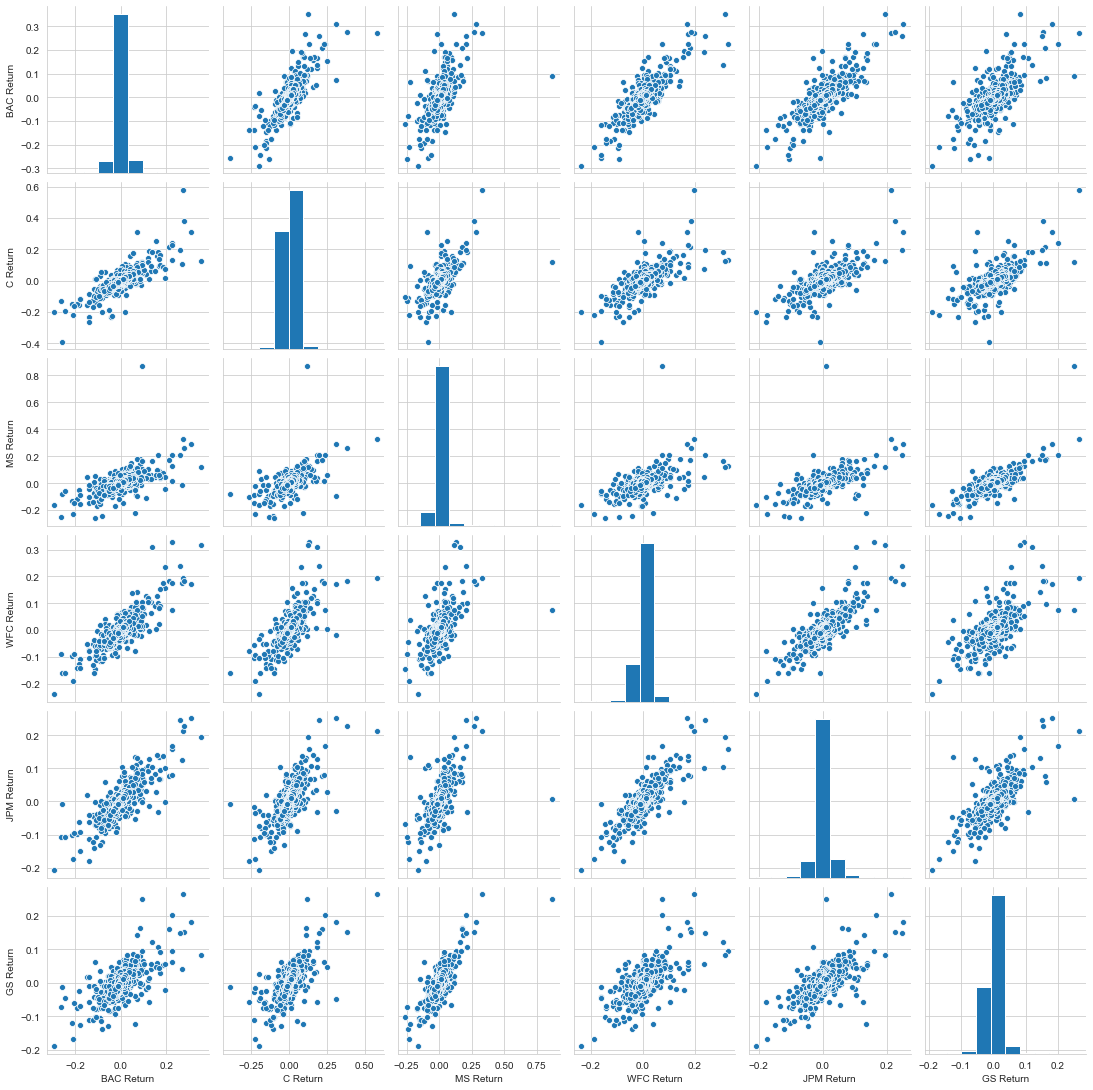

In [75]:
stocks_plot = sns.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [26]:
returns.idxmax(axis=0)

BAC Return   2009-04-09
C Return     2008-11-24
MS Return    2008-10-13
WFC Return   2008-07-16
JPM Return   2009-01-21
GS Return    2008-11-24
dtype: datetime64[ns]

In [36]:
returns.idxmin(axis=0)

BAC Return   2009-01-20
C Return     2009-02-27
MS Return    2008-10-09
WFC Return   2009-01-20
JPM Return   2009-01-20
GS Return    2009-01-20
dtype: datetime64[ns]

**
20th Jan 2009 - Inauguration of President Obama 
**

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [29]:
returns.std()

BAC Return    0.036647
C Return      0.038672
MS Return     0.037819
WFC Return    0.030238
JPM Return    0.027667
GS Return     0.025390
dtype: float64

In [78]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
MS Return     0.016249
WFC Return    0.012591
JPM Return    0.014017
GS Return     0.014046
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

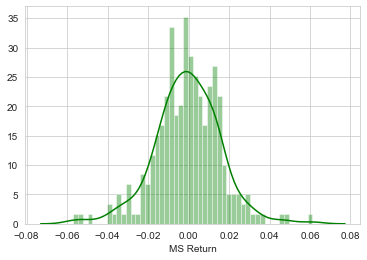

In [100]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=50,color = 'green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

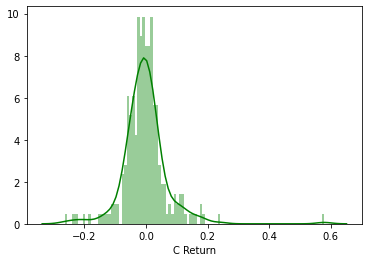

In [39]:
sns.distplot(returns['C Return'].loc['2008-01-01':'2008-12-31'], bins=100,color = 'green')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

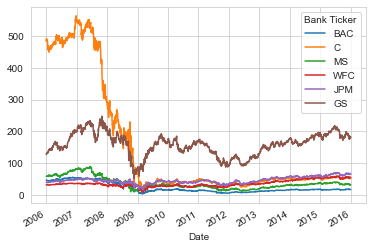

In [41]:
round(bank_stocks.xs(key = 'Close', axis = 1, level = 1),2).plot()

In [80]:
round(bank_stocks.xs(key = 'Close', axis = 1, level = 1),2).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

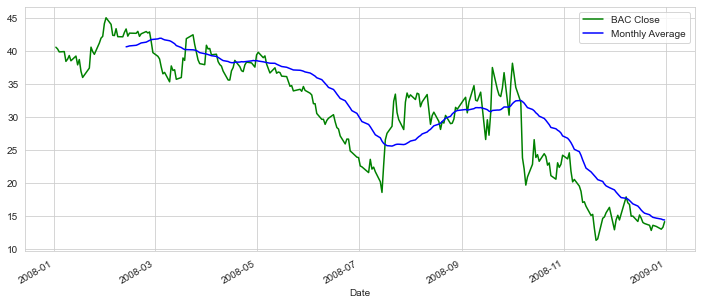

In [42]:
plt.figure(figsize =(12,5))
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(color = 'green', legend = True, label = 'BAC Close')
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window = 30).mean().plot(color = 'blue', legend = True, label = 'Monthly Average')


** Create a heatmap of the correlation between the stocks Close Price.**

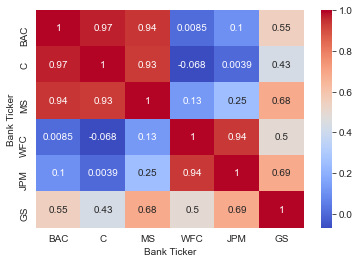

In [52]:
sns.heatmap(round(bank_stocks.xs(key = 'Close', axis = 1, level = 1)).corr(), cmap='coolwarm', annot = True)

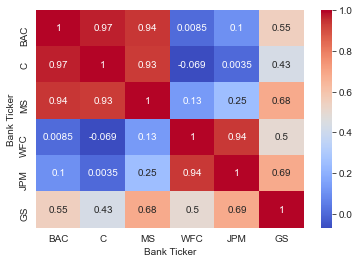

In [53]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), cmap ='coolwarm', annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

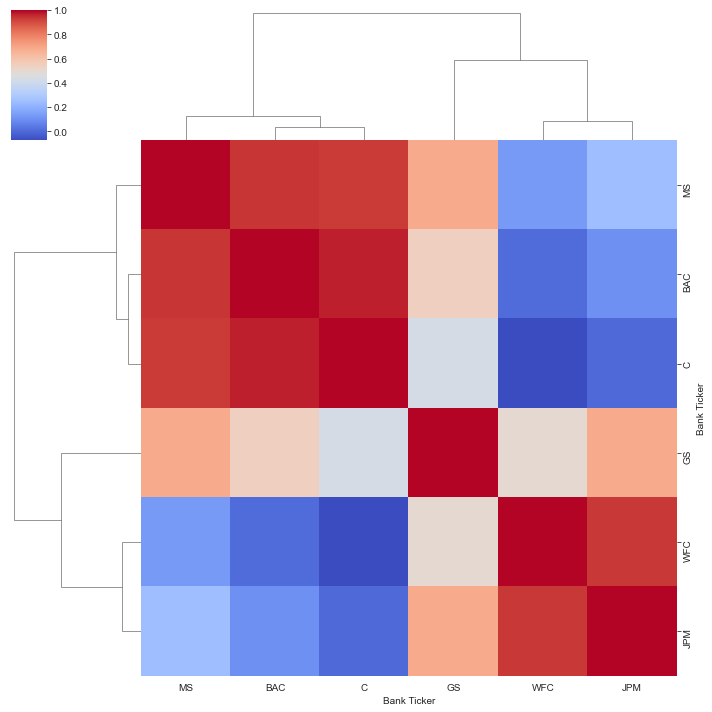

In [56]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), cmap = 'coolwarm')